# Churn

## Goal:

- Discover drivers of churn in Telco
- Use drivers to develop

# Imports

In [17]:
import pandas as pd
from scipy import stats
import wrangle as acq
import env
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from io import StringIO

# Acquire

- Data acquired from Kaggle
- It contained 7043 rows and 31 columns before cleaning
- Each row represents a chess game played on Lichess.org
- Each column represents a feature of those games

# Prepare

Prepare Actions:

Removed columns that did not contain useful information
Checked for nulls in the data (there were none)
Removed rows with nulls
Split data into train test validate

# Data Dictionary

| Feature | Definition |
|:--------|:-----------|
|tenure| How many months the customer has been a customer|
|monthly_charges| How much the customer pays monthly|
|Contract type ID| The total the customer has paid|
|gender_Male| Whether the customer is male or not (0:no, 1:yes)|
|senior_citizen_Yes| Whether the customer is a senior citizen or not 0:no, 1:yes|
|partner_Yes| Whether the customer has a partner or not (0:no, 1:yes)|
|dependents_Yes| Whether the customer has dependents or not (0:no, 1:yes)|
|phone_service_Yes| Whether the customer has phone service or not (0:no, 1:yes)|
|multiple_lines_No phone service| Whether the customer has multiple lines of service w/o phone service|
|multiple_lines_Yes| Whether the customer has multiple lines of service or not|
|online_security_No internet service|Whether the customer has online security w/o internet service or not|
|online_security_Yes|Whether the customer has online security or not|
|online_backup_No internet service|Whether the customer has online backup w/o internet service or not|
|online_backup_Yes|Whether the customer has online backup or not|
|device_protection_No internet service|Whether the customer has device protection w/o internet service or not|
|device_protection_Yes|Whether the customer has device protection or not|
|tech_support_No internet service|Whether the customer has tech support w/o internet service or not|
|tech_support_Yes|Whether the customer has tech support or not|
|streaming_tv_No internet service|Whether the customer has tv streaming services w/o internet service or not|
|streaming_tv_Yes|Whether the customer has tv streaming services or not|
|streaming_movies_No internet service|Whether the customer has movie streaming services w/o internet services or not|
|streaming_movies_Yes|Whether the customer has movie streaming services or not|
|paperless_billing_Yes|Whether the customer is enrolled in paperless billing or not|
|churn_Yes|Whether the customer churned or not 0:no, 1:yes|



In [15]:
X.columns

Index(['tenure', 'monthly_charges', 'total_charges', 'gender_Male',
       'senior_citizen_Yes', 'partner_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'paperless_billing_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

In [22]:
# acquiring, cleaning, and adding features to data
df = acq.prep_telco()

#Split dataset into two components

X = df.drop(['tenure', 'monthly_charges', 'total_charges',
             'phone_service_Yes', 'multiple_lines_No phone service', 
            'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'paperless_billing_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'], axis=1)
Y = df.churn_Yes

#converted X and Y components into DataFrames

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)


# splitting data into train, validate, and test
X_train, X_validate, X_test, y_train, y_validate, y_test = acq.train_validate_test_split(X, Y)

csv file found and loaded


## A brief look at the data

In [23]:
X_train.head()

,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,churn_Yes
5911,1,0,0,1,0
2479,0,0,1,0,0
5889,0,0,0,0,1
6087,1,0,0,0,0
785,0,0,0,0,0


In [24]:
y_train.head()

,churn_Yes
5911,0
2479,0
5889,1
6087,0
785,0


## A summary of the data

In [25]:
y_train.describe()

,churn_Yes
count,4225.000000
mean,0.265325
std,0.441559
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [26]:
X_train.describe()

,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,churn_Yes
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.508639,0.161893,0.488521,0.306272,0.265325
std,0.499985,0.368397,0.499927,0.460999,0.441559
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Explore

#### Answer the following initial questions:


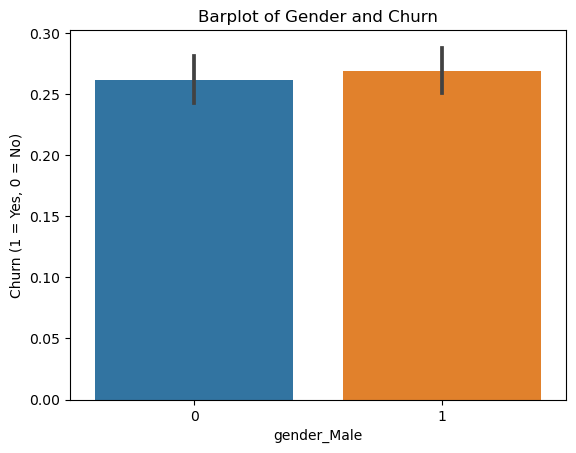

In [7]:
# Is one gender more likely to affect churn than the other?

sns.barplot(x = X_train.gender_Male , y = y_train.churn_Yes, data=df)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Gender and Churn')

# Show the plot
plt.show()

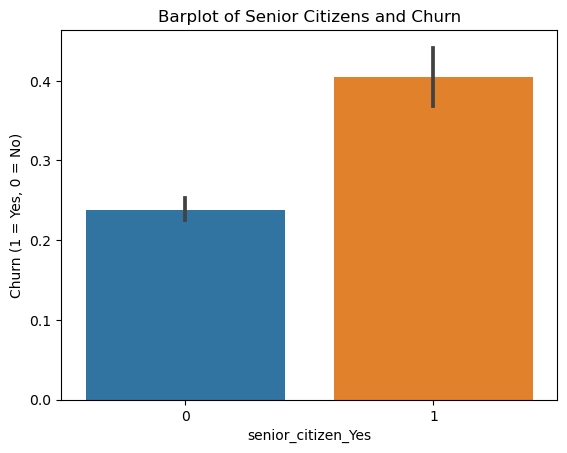

In [8]:
# Are senior citizens more likely to churn?

sns.barplot(X_train.senior_citizen_Yes, y_train.churn_Yes, data=df)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Senior Citizens and Churn')

# Show the plot
plt.show()

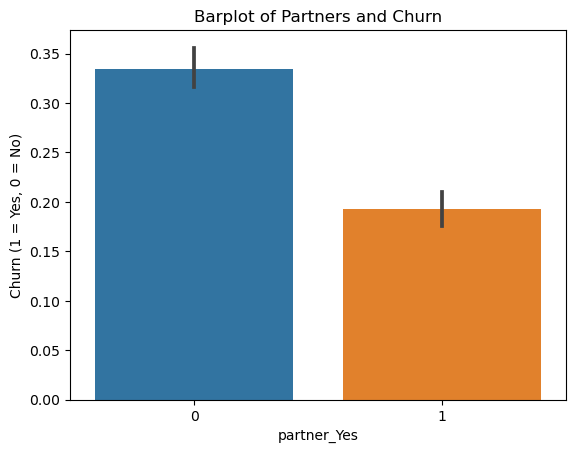

In [9]:
# Do people with dependents churn more?

sns.barplot(X_train.partner_Yes, y_train.churn_Yes, data=df)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Partners and Churn')

# Show the plot
plt.show()

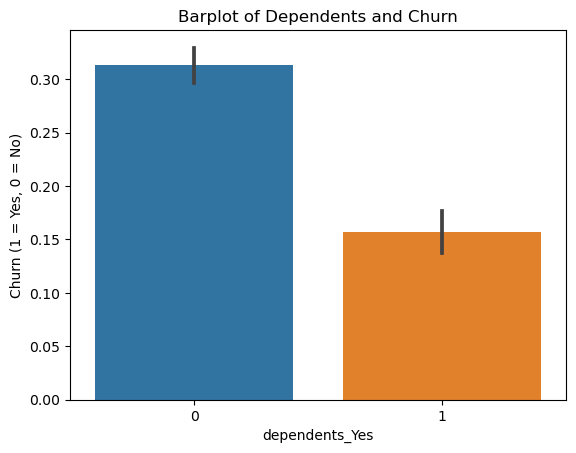

In [10]:
# Do people with partners churn more?

sns.barplot(X_train.dependents_Yes, y_train.churn_Yes)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Dependents and Churn')

# Show the plot
plt.show()

## Exploration Summary

    - Gender doesn't seem to be strongly associated with churn
    - There is a stronger relationship between churn and whether the customers have children, and/or partners
    
## Modeling

    - I will use accuracy as my evaluation metric
    - My baseline accuracy was 73%
    - I was able to achieve an accuracy of 78%
    
## Decision Tree

In [11]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train)
tree.score(X_validate, y_validate)

0.7253371185237757

In [12]:
for x in range(1,9):
#     print(x)
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    val = tree.score(X_validate, y_validate)
    print(f'for depth of {x:2}, the train accuracy is {round(acc,2)}')
    print(f'for depth of {x:2}, the validate accuracy is {round(val,2)}')
    print()

for depth of  1, the train accuracy is 0.73
for depth of  1, the validate accuracy is 0.73

for depth of  2, the train accuracy is 0.79
for depth of  2, the validate accuracy is 0.79

for depth of  3, the train accuracy is 0.79
for depth of  3, the validate accuracy is 0.79

for depth of  4, the train accuracy is 0.79
for depth of  4, the validate accuracy is 0.8

for depth of  5, the train accuracy is 0.8
for depth of  5, the validate accuracy is 0.79

for depth of  6, the train accuracy is 0.81
for depth of  6, the validate accuracy is 0.79

for depth of  7, the train accuracy is 0.82
for depth of  7, the validate accuracy is 0.79

for depth of  8, the train accuracy is 0.84
for depth of  8, the validate accuracy is 0.78



## Random Forest

In [13]:
tree = RandomForestClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train)
tree.score(X_validate, y_validate)

0.7906316536550745

In [14]:
for x in range(1,9):
#     print(x)
    tree = RandomForestClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    val = tree.score(X_validate, y_validate)
    print(f'for depth of {x:2}, the train accuracy is {round(acc,2)}')
    print(f'for depth of {x:2}, the validate accuracy is {round(val,2)}')
    print()

for depth of  1, the train accuracy is 0.73
for depth of  1, the validate accuracy is 0.73

for depth of  2, the train accuracy is 0.76
for depth of  2, the validate accuracy is 0.75

for depth of  3, the train accuracy is 0.78
for depth of  3, the validate accuracy is 0.79

for depth of  4, the train accuracy is 0.79
for depth of  4, the validate accuracy is 0.8

for depth of  5, the train accuracy is 0.8
for depth of  5, the validate accuracy is 0.81

for depth of  6, the train accuracy is 0.81
for depth of  6, the validate accuracy is 0.81

for depth of  7, the train accuracy is 0.82
for depth of  7, the validate accuracy is 0.8

for depth of  8, the train accuracy is 0.84
for depth of  8, the validate accuracy is 0.8



## Comparing Models

Decision Tree and Random Forest at a depth of 7 to 8 performed about better than baseline and at that depth approximated my baseline accuracy 
    
# Conclusions

### Exploration

Gender doesn't seem to be strongly associated with churn. There is a stronger relationship between churn and whether the customers are senior citizents, have children, and/or partners.

### Modeling

The final model signinficantly outperformed the baseline

### Recommendations 

Offer discounts to senior citizens to reduce churn, and family bundle discounts to fortify the lower churn rate of those with partners and dependents.

### Next Steps

Do additional analysis comparing combinations of features to find the highest combinations of churn.